In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('pylab', 'inline')

Populating the interactive namespace from numpy and matplotlib


# Reading data

In [2]:
data = pd.read_csv("data/AmesHousing.csv")

In [3]:
data.drop(["PID","Order"],axis="columns",inplace=True) #nos deshacemos de el índice de instancia e id

In [134]:
attr = np.array(list(data.columns))
numerical = ["Lot Frontage", "Lot Area", "Overall Qual", "Overall Cond", "Year Built", "Year Remod/Add", 
             "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "1st Flr SF",
             "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath",
             "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Yr Blt", 
             "Garage Cars", "Garage Area", "Wood Deck SF", "Open Porch SF", "Enclosed Porch", "3Ssn Porch",
             "Screen Porch", "Pool Area", "Misc Val", "Mo Sold", "Yr Sold","SalePrice"]
label = "SalePrice"
categorical = np.setdiff1d(attr,numerical)

In [5]:
data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [6]:
data_cat = data[categorical].fillna("UNKNOWN")
data_cat[label] = data[label]
data_num = data[numerical]
data_num[label] = data[label]

/home/dizzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Representación de categoricas

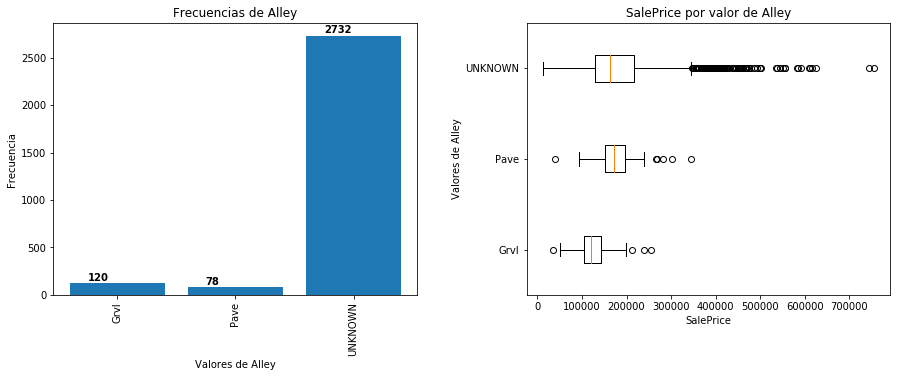

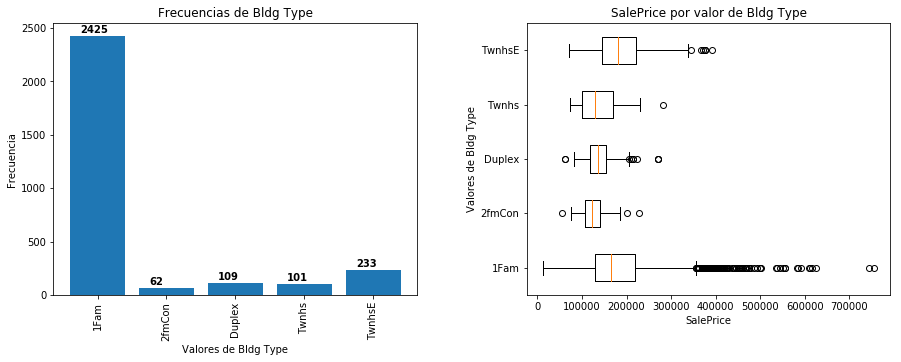

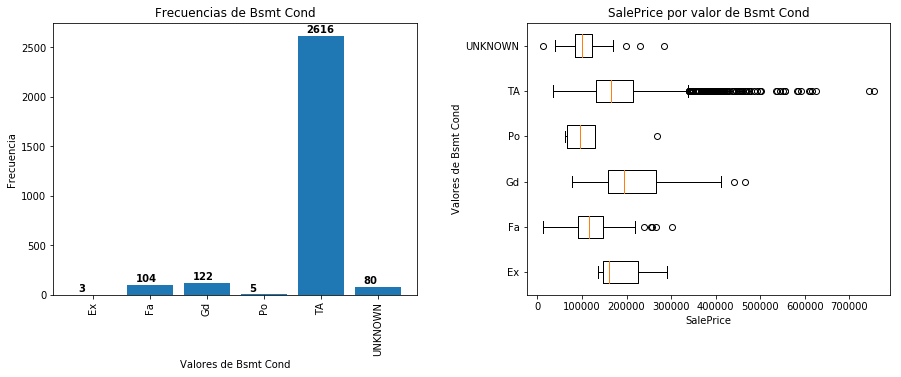

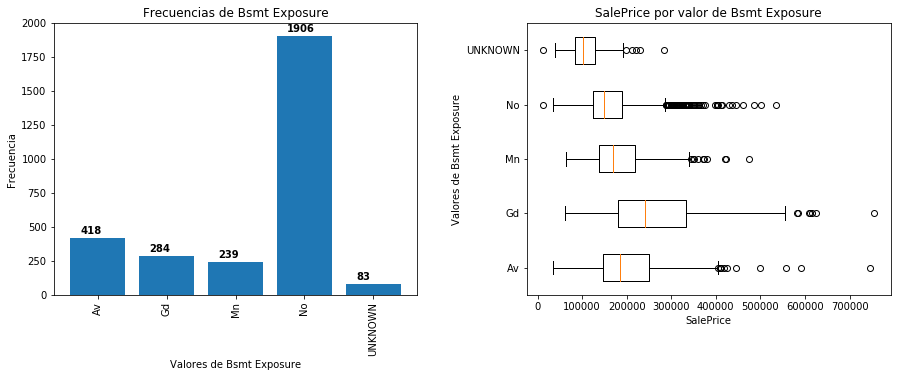

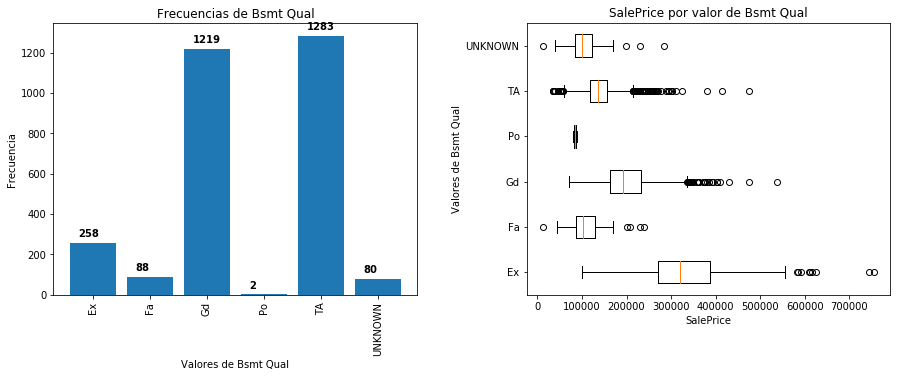

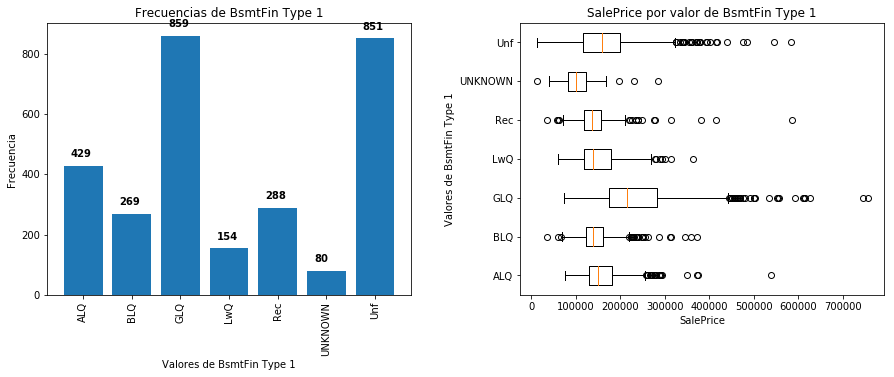

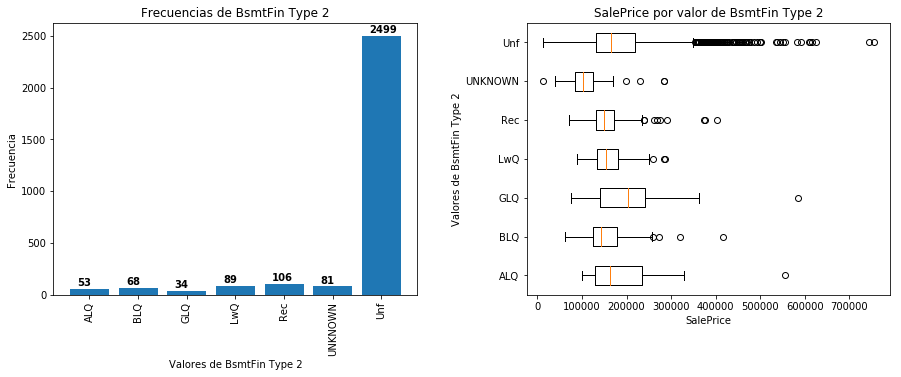

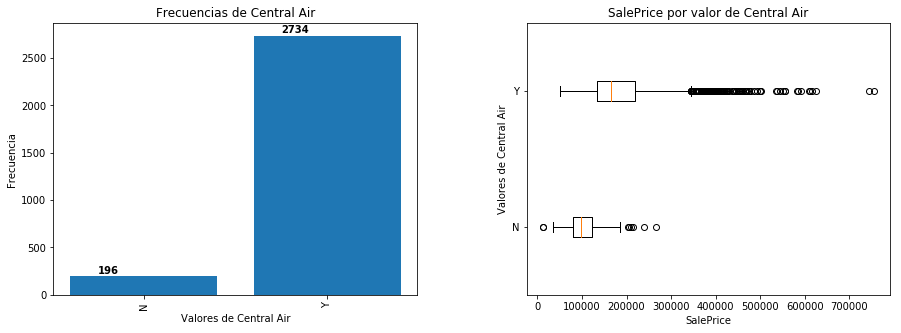

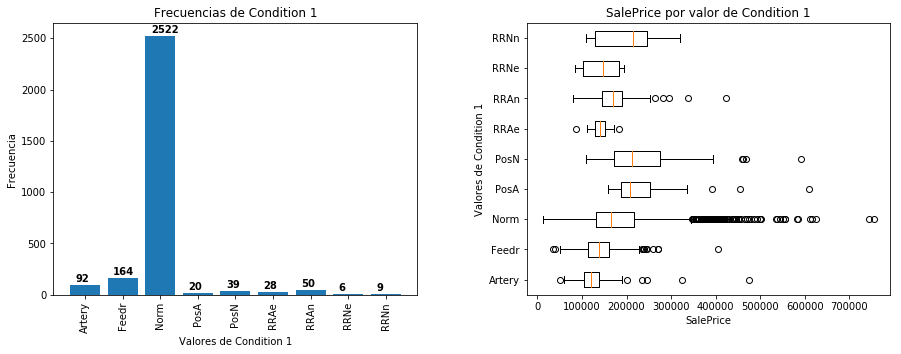

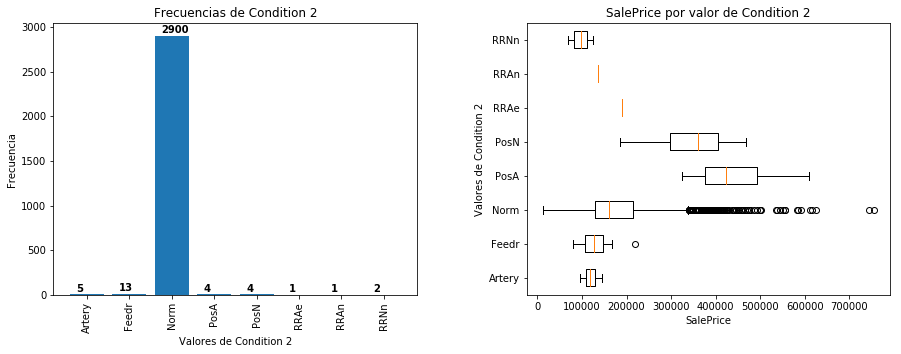

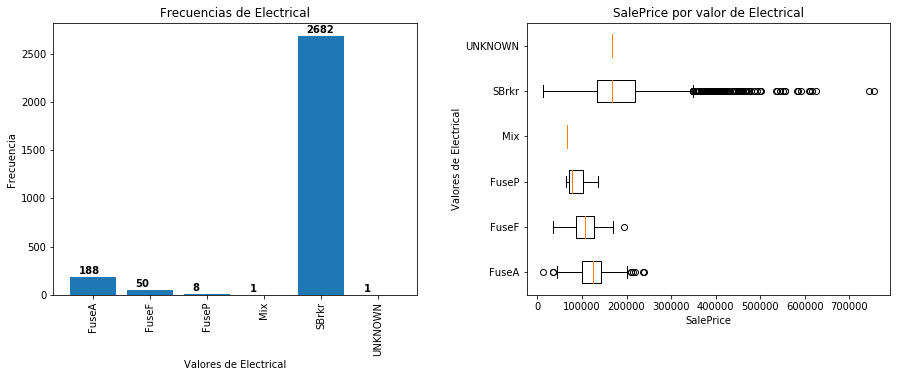

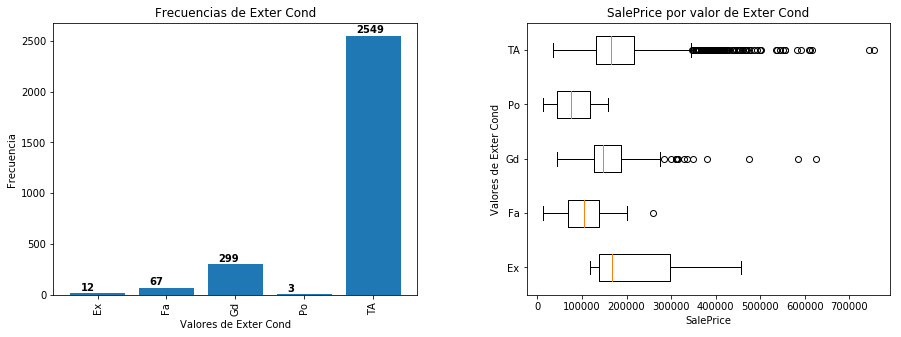

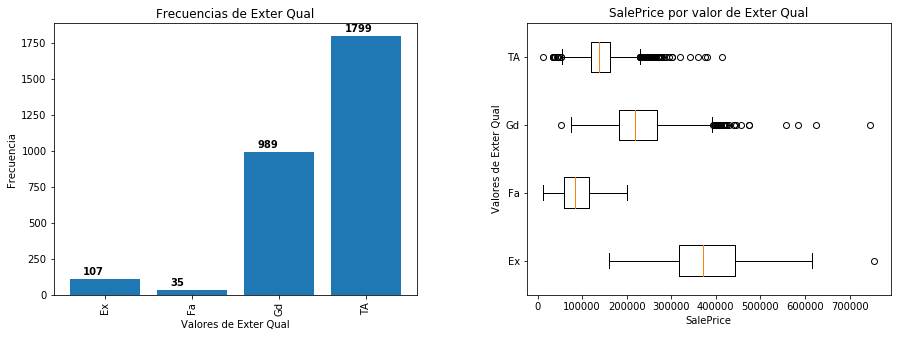

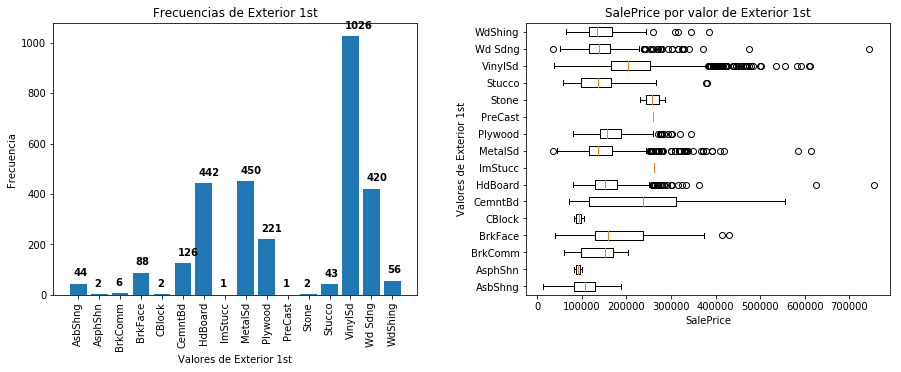

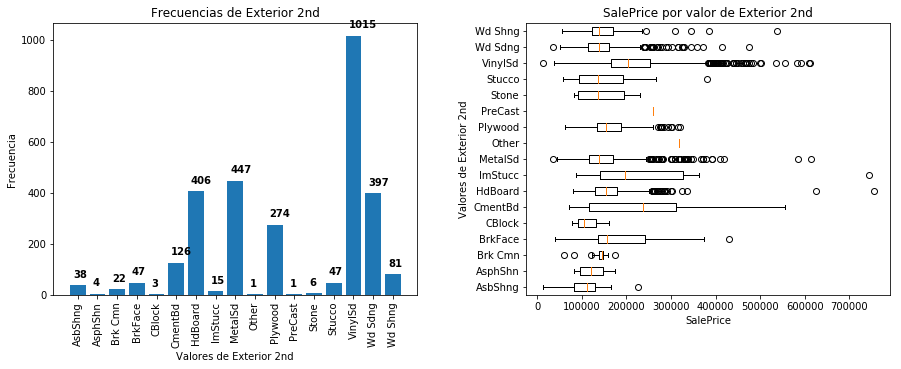

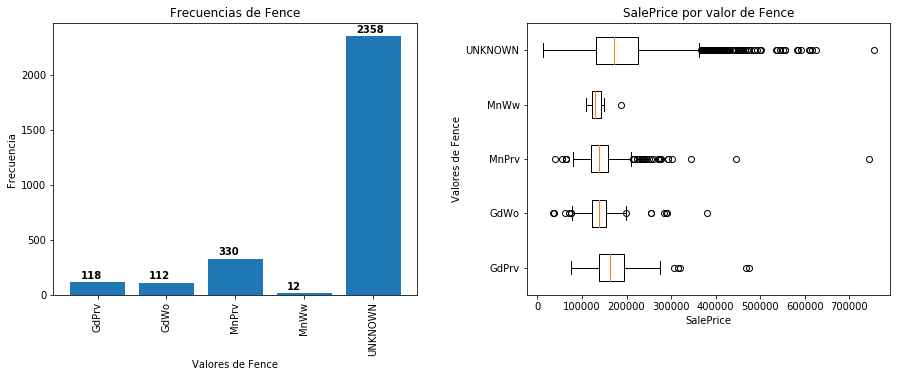

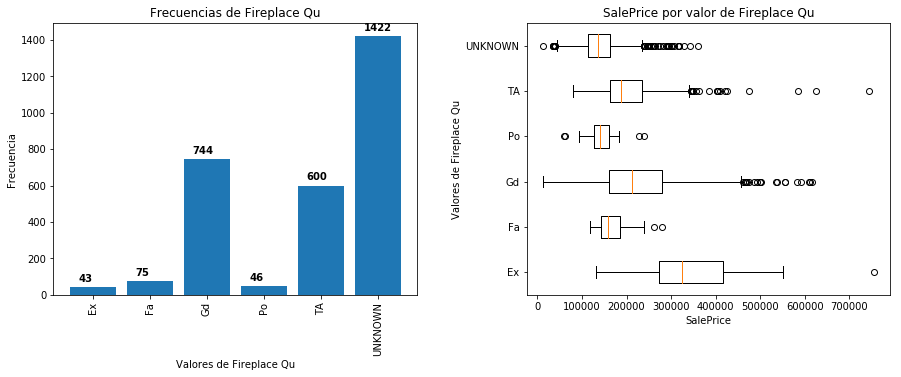

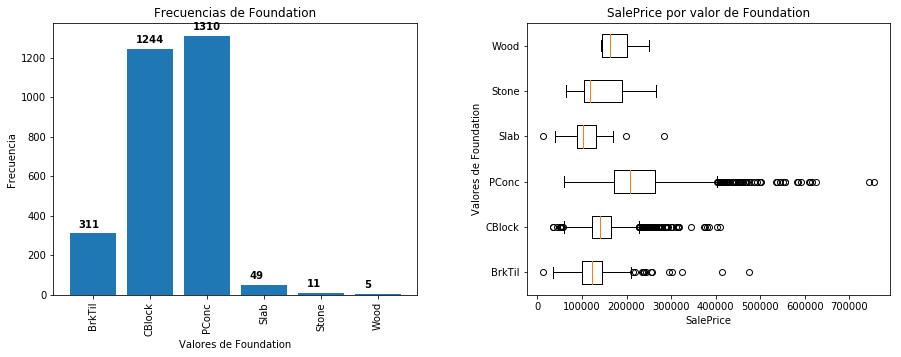

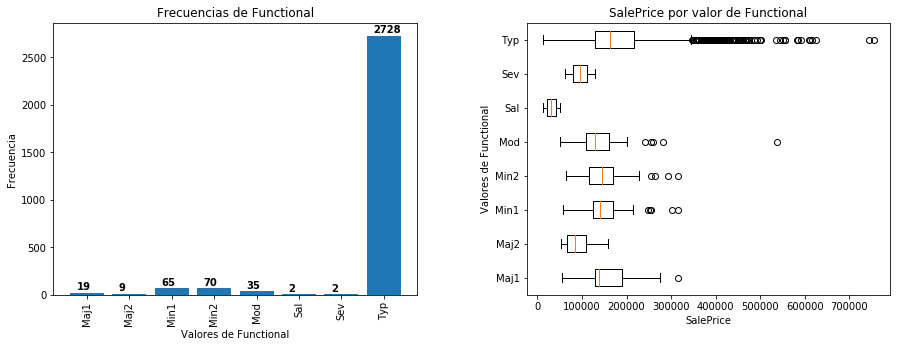

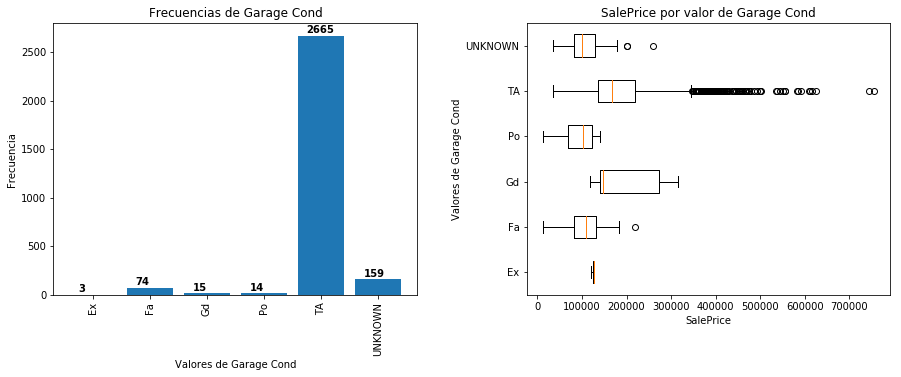

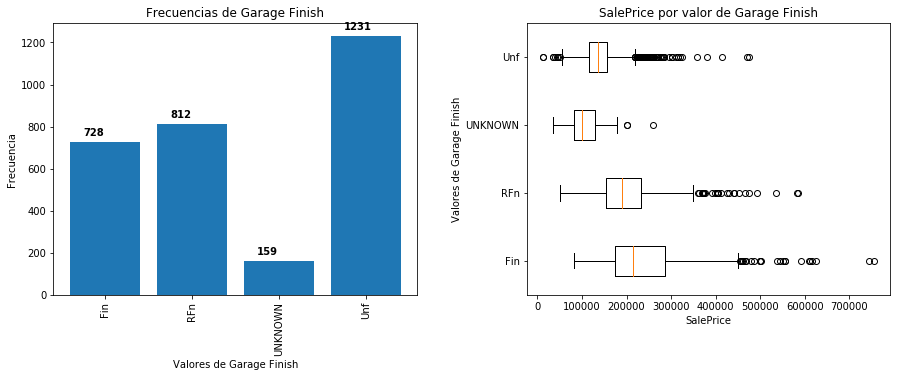

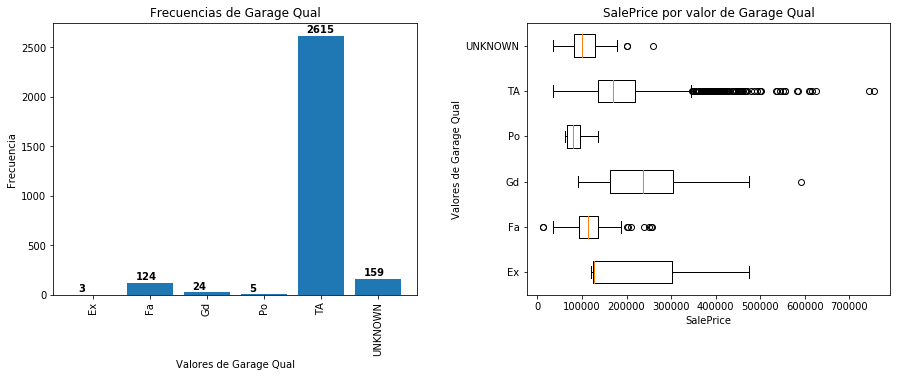

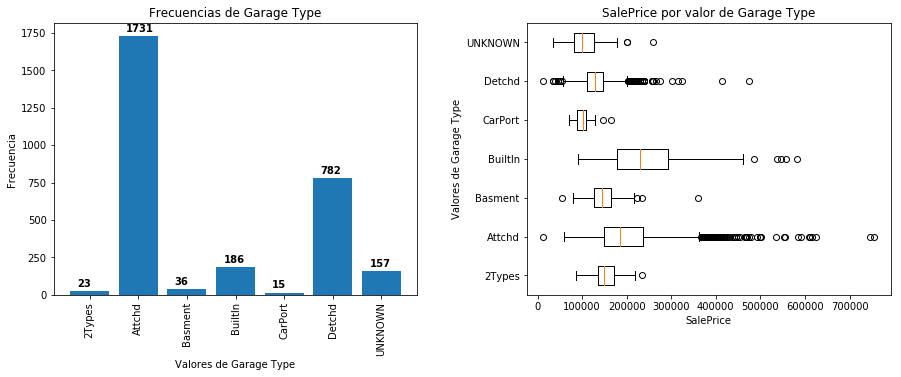

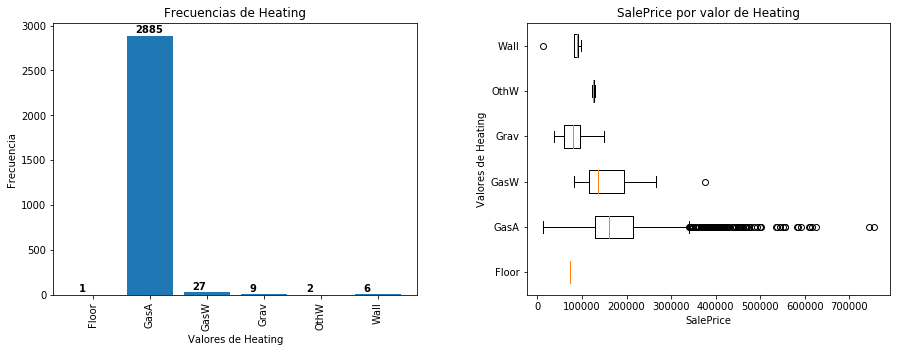

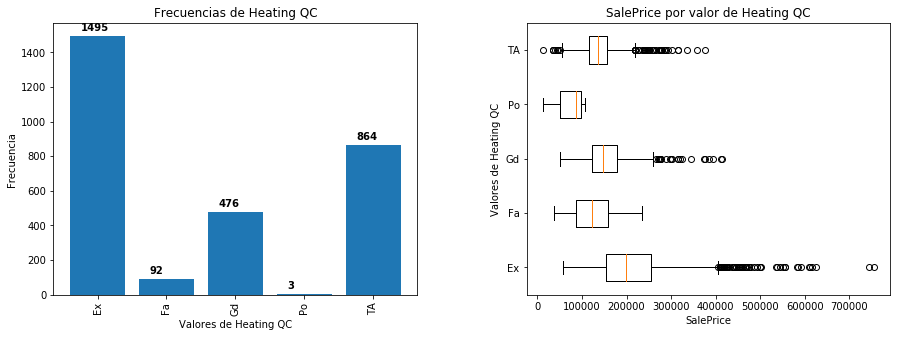

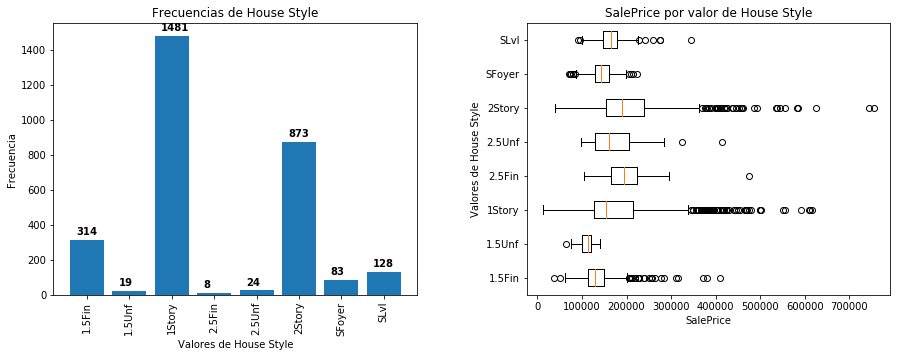

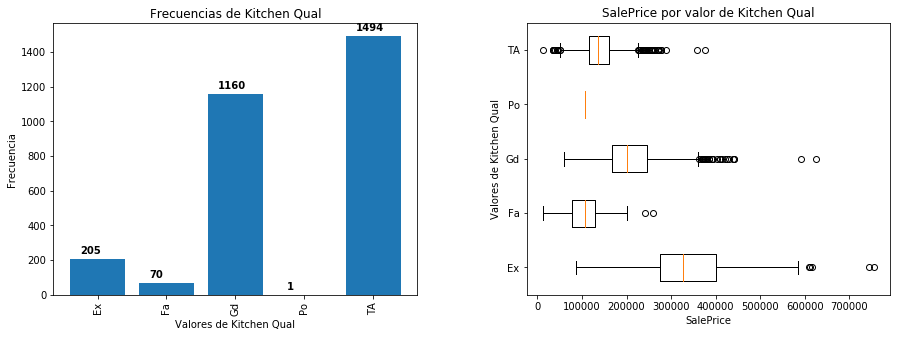

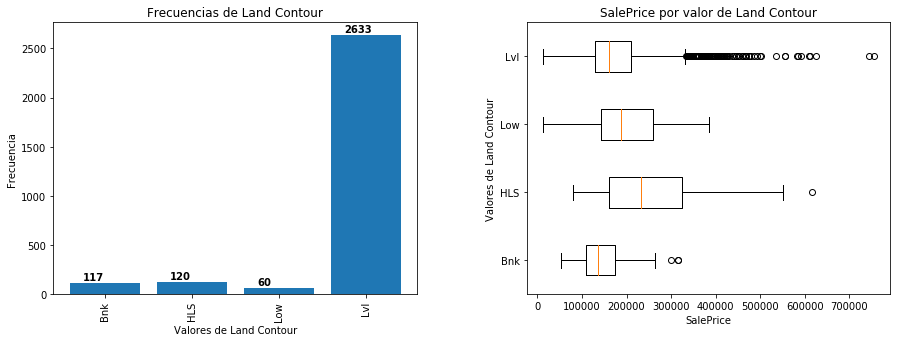

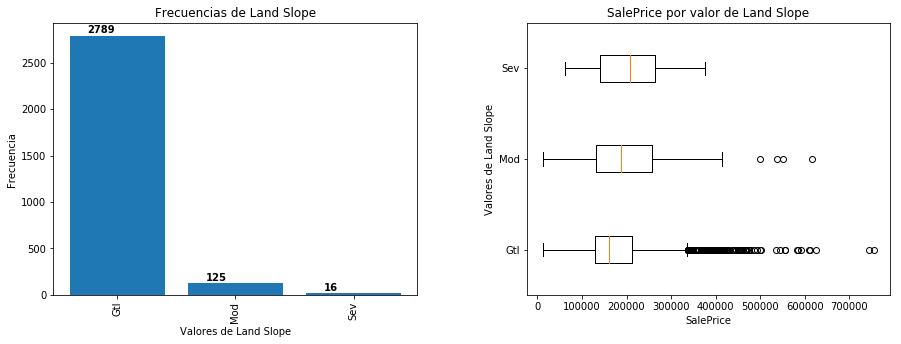

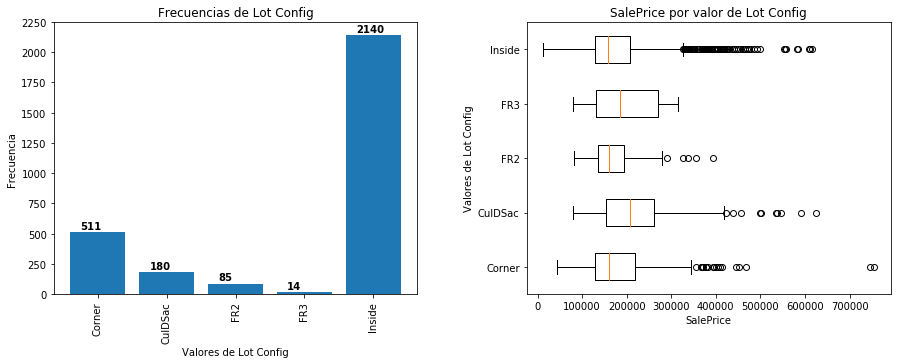

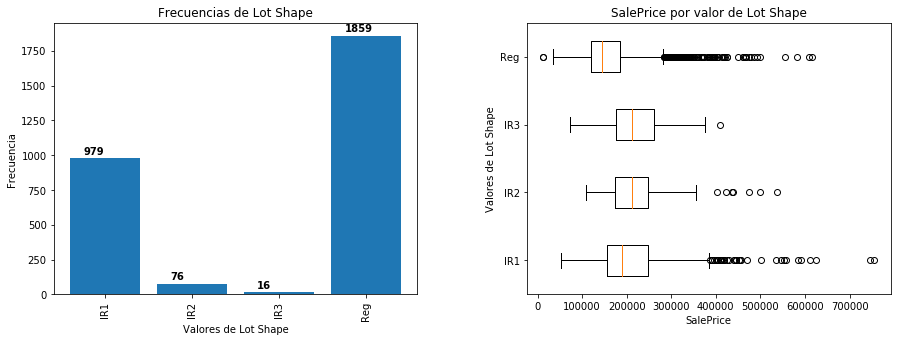

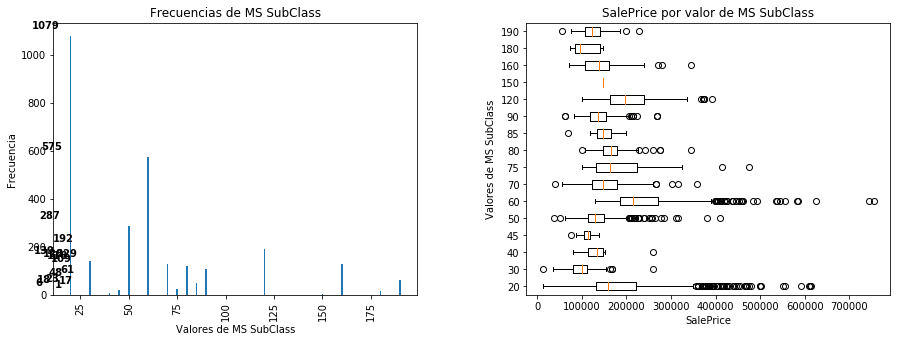

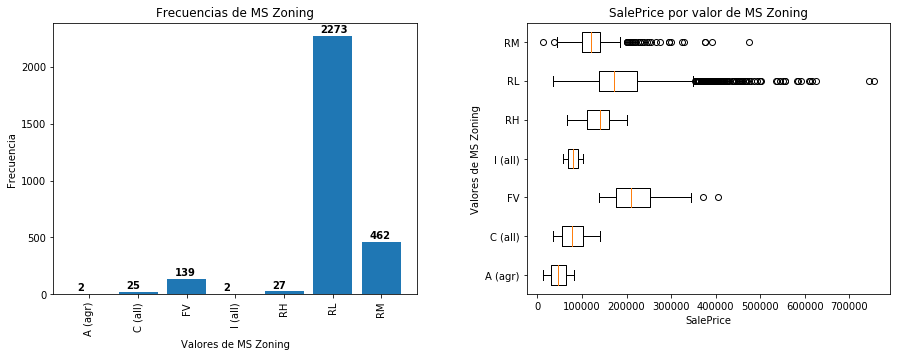

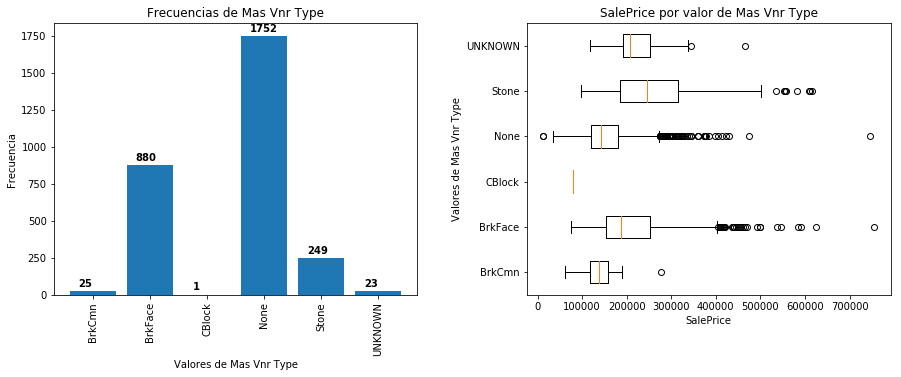

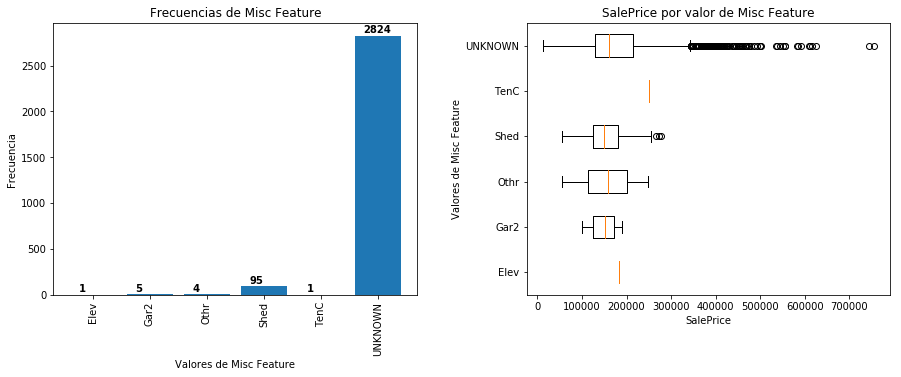

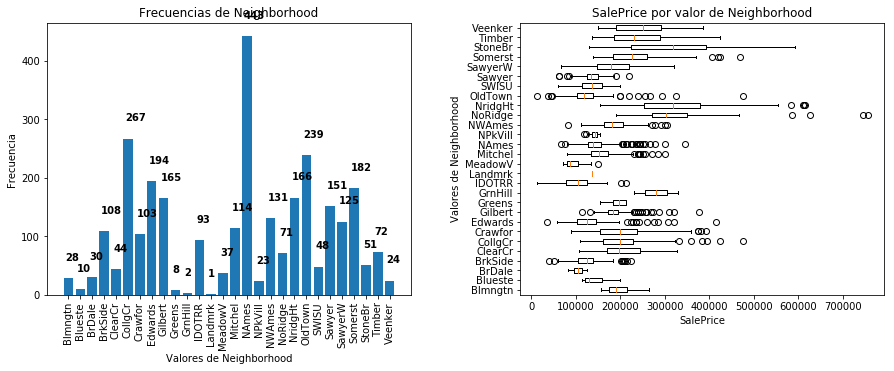

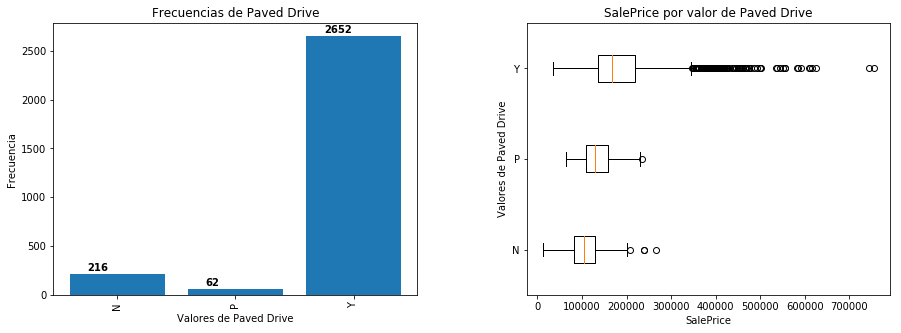

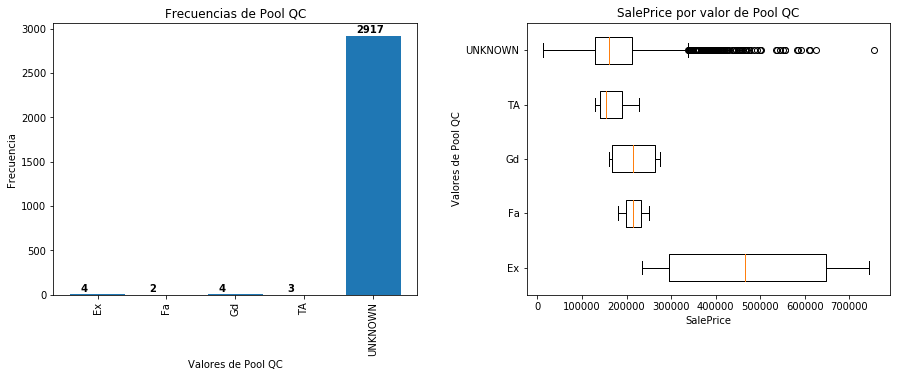

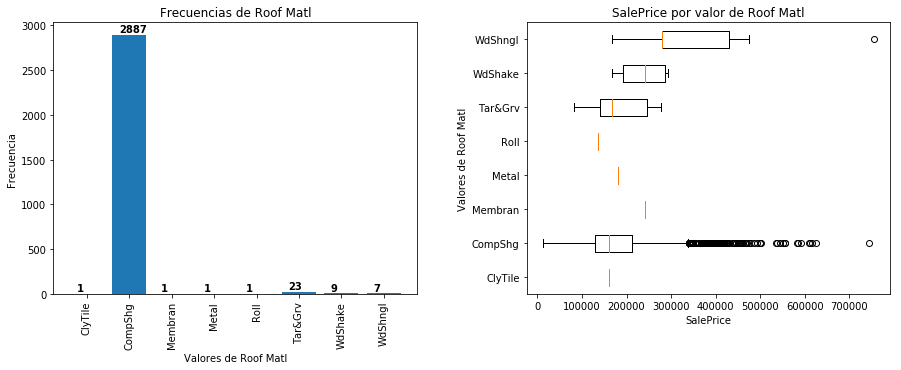

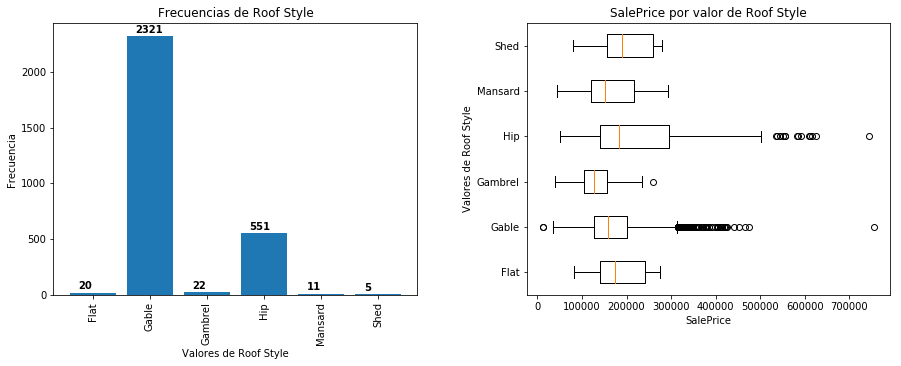

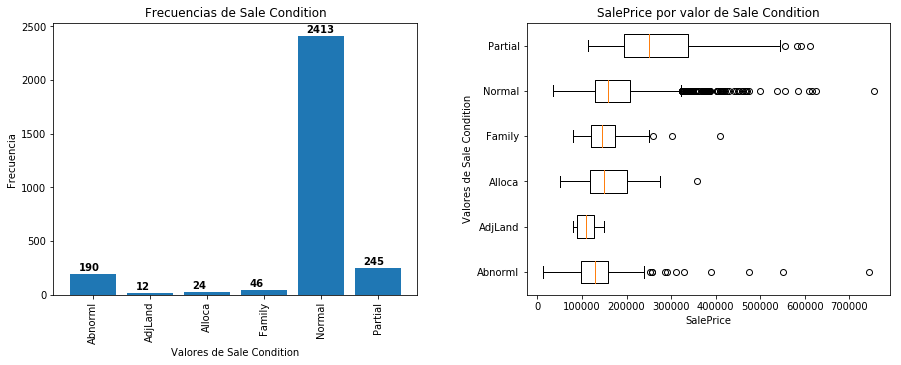

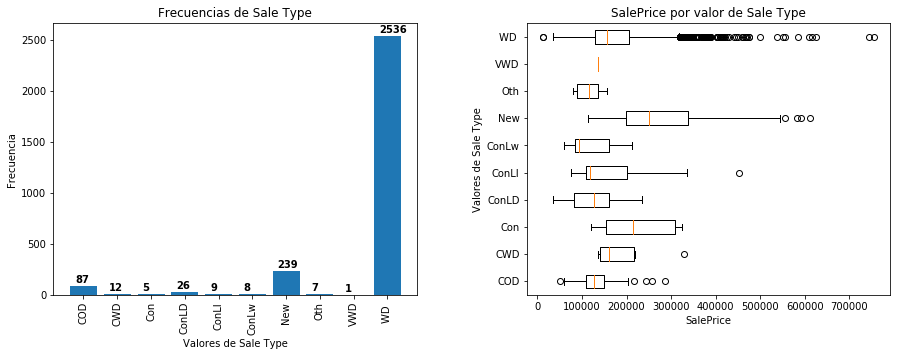

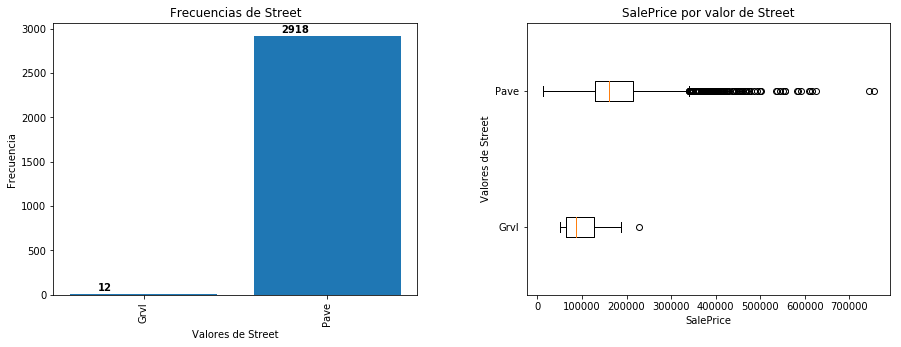

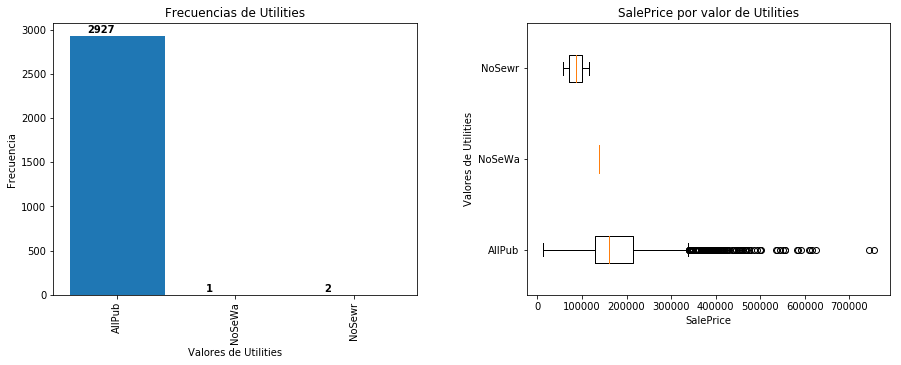

In [85]:
pylab.rcParams['figure.figsize'] = (15, 5)
for cat in categorical:
    freq = np.unique(data_cat[cat],return_counts=True)
    counts_by_value = data_cat.groupby(data_cat[cat])[label].apply(lambda x: np.array(x))
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.3)
    
    ax1.bar(freq[0], freq[1])
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    
    for i, v in enumerate(freq[1]):
        ax1.text(i-.25,v+30, str(v), color='black', fontweight='bold')
    
    ax1.set_title("Frecuencias de %s" % cat)
    ax1.set_xlabel("Valores de %s" % cat)
    ax1.set_ylabel("Frecuencia")
    
    ax2.boxplot(counts_by_value, labels=counts_by_value.index,vert=False)
    
    ax2.set_title("%s por valor de %s" % (label,cat))
    ax2.set_xlabel("%s" % label)
    ax2.set_ylabel("Valores de %s" % cat)
    
    fig.savefig("graphs/"+cat+".png")
    
    plt.show()

# Representación de numéricos

In [99]:
means = data_num.mean()
std = data_num.std()
mins = data_num.min()
maxs = data_num.max()
numnans = data_num.isna().sum()

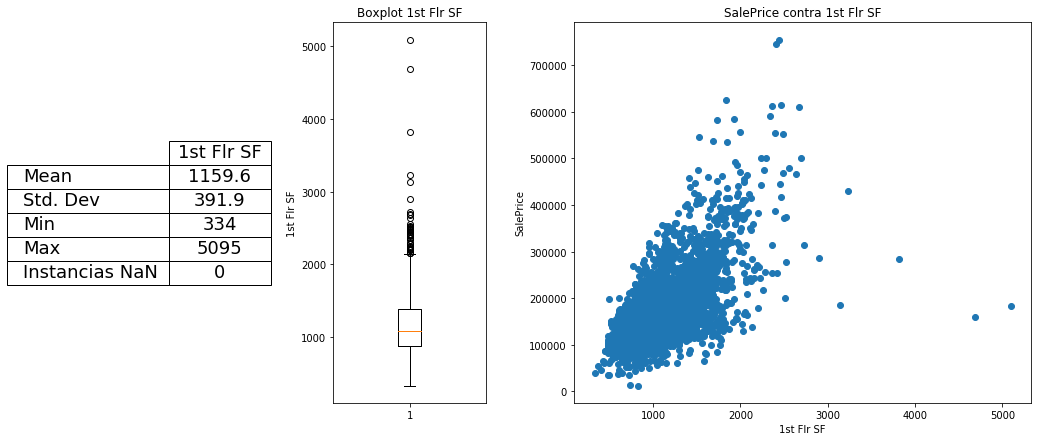

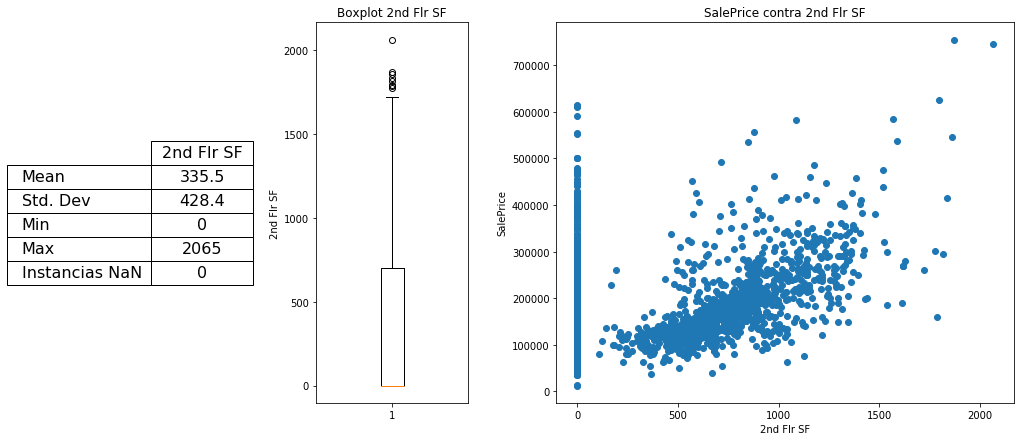

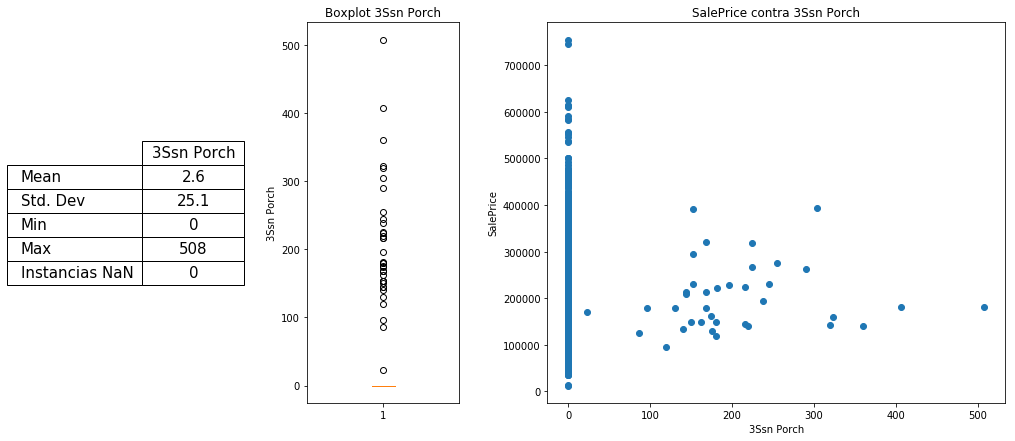

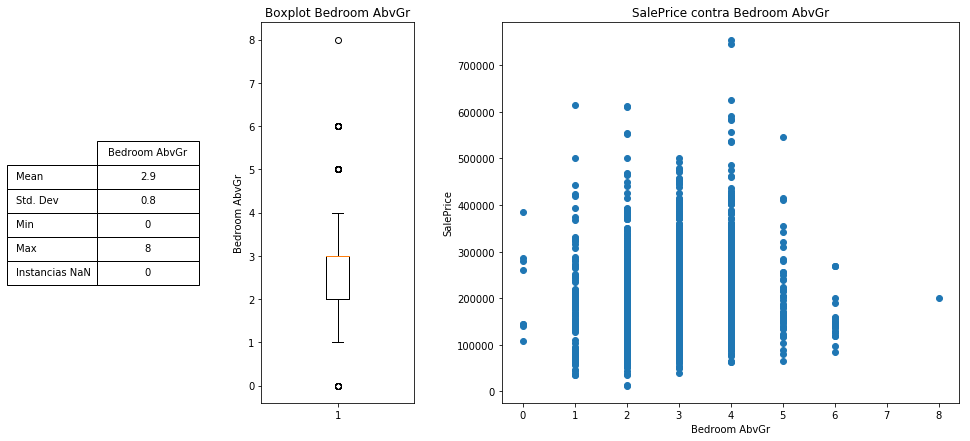

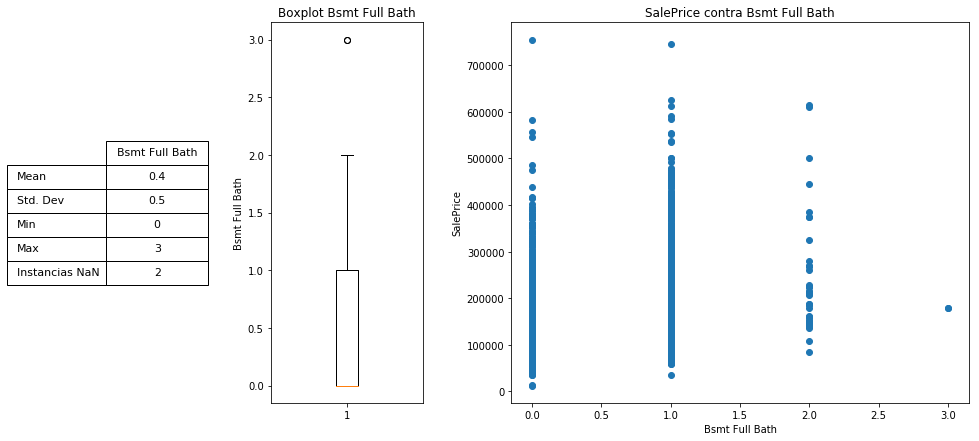

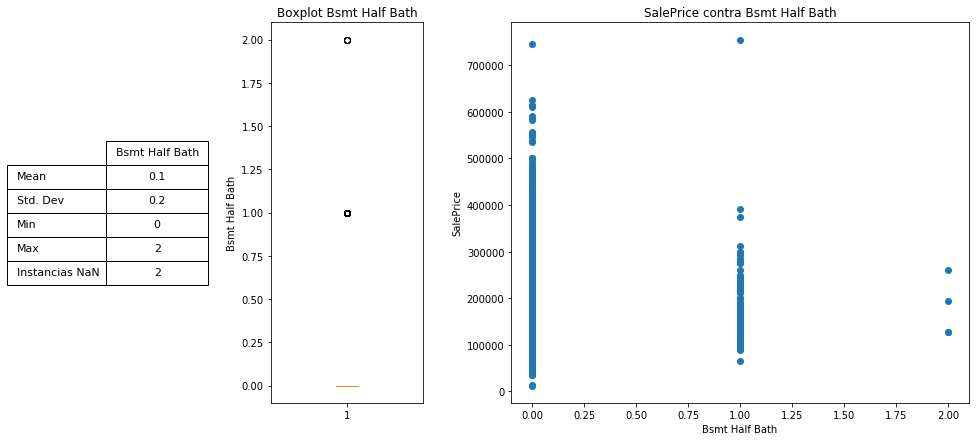

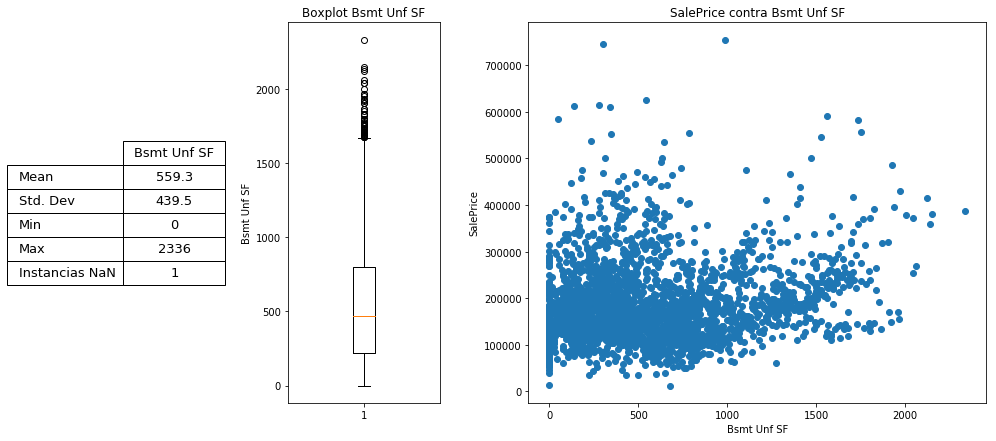

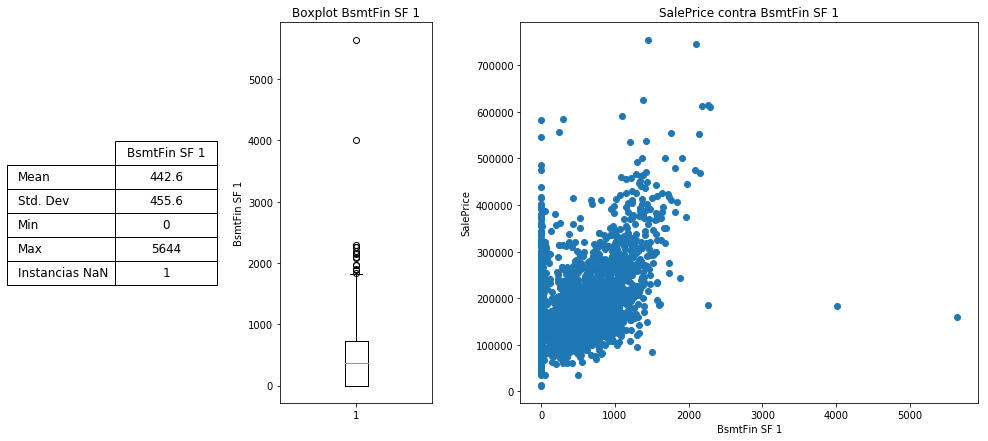

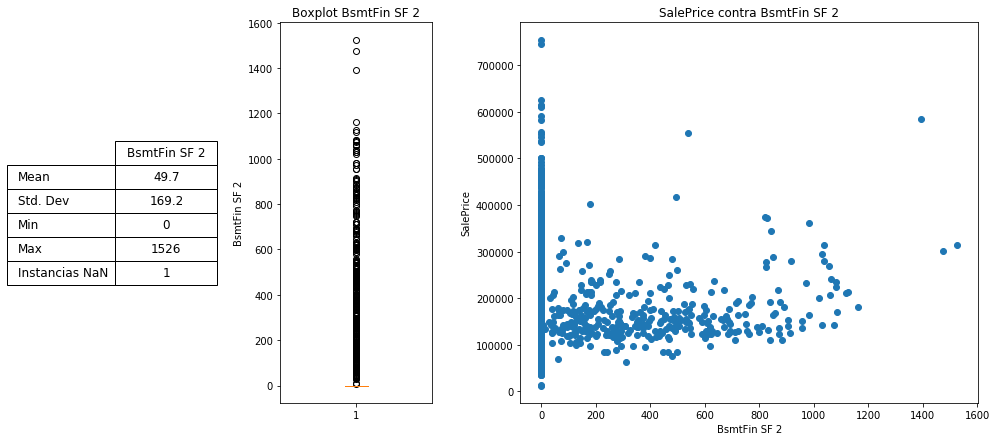

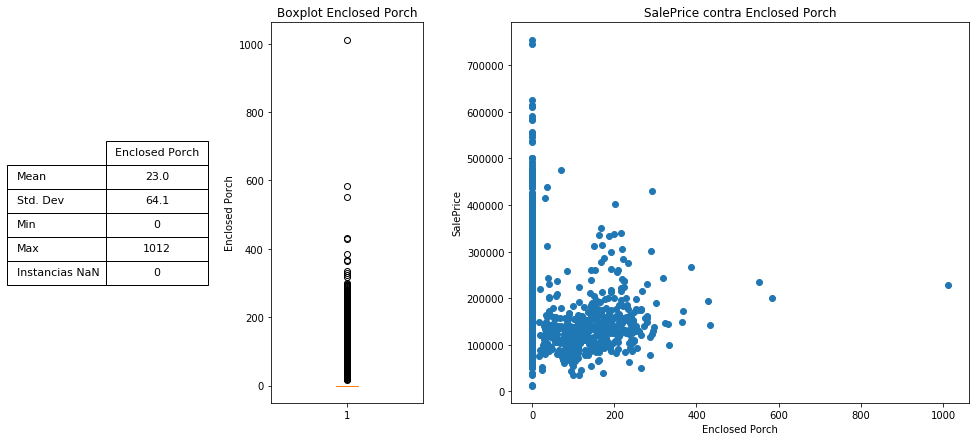

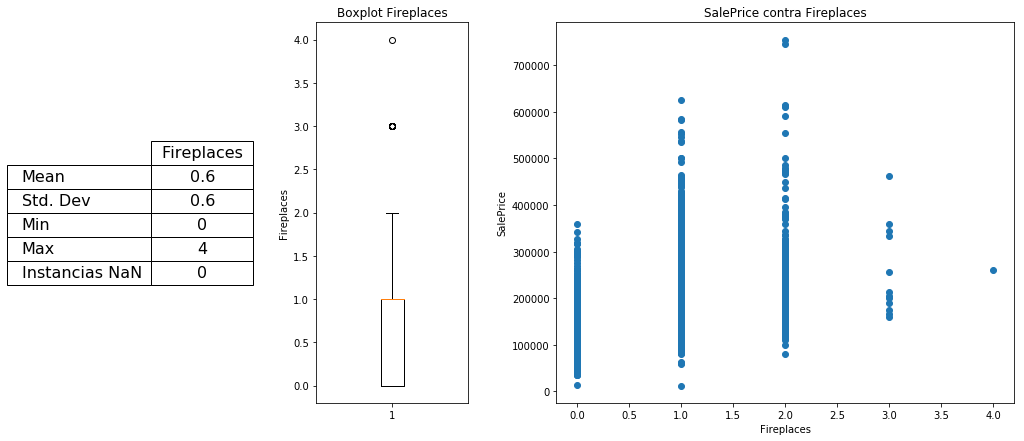

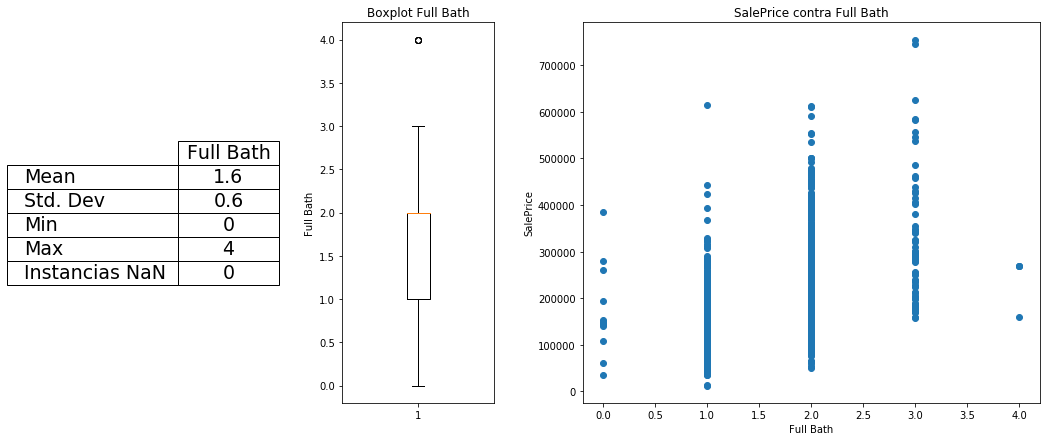

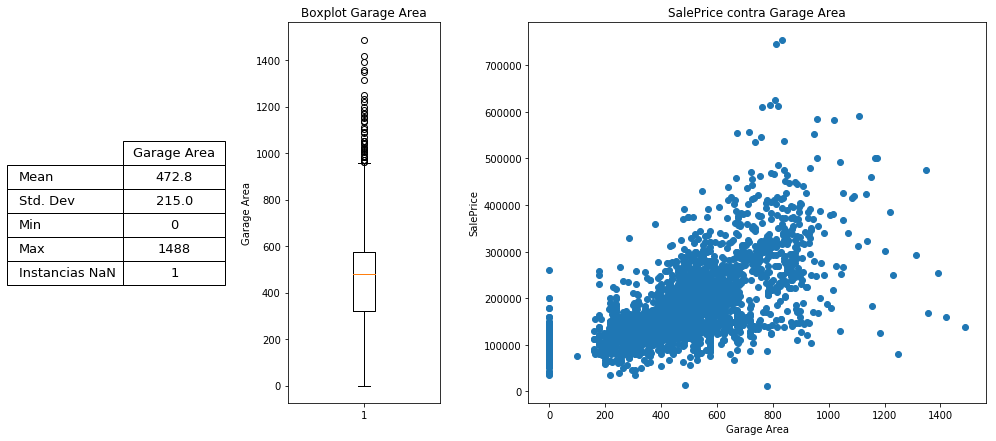

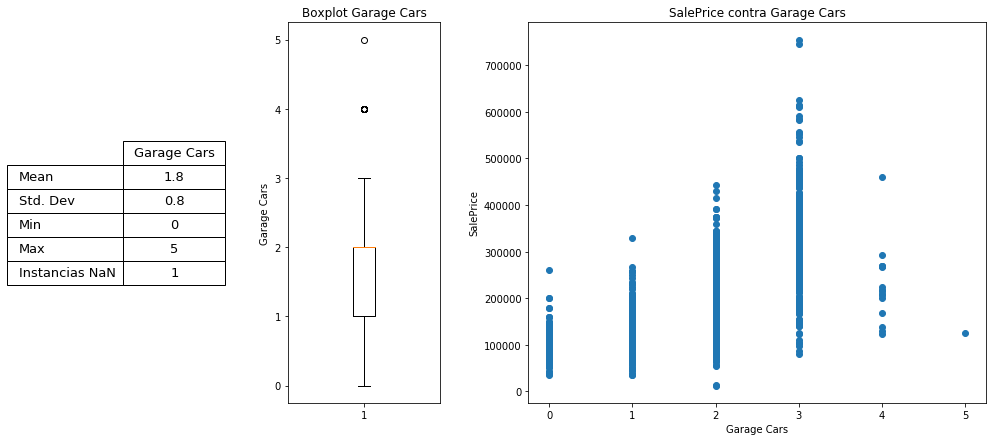

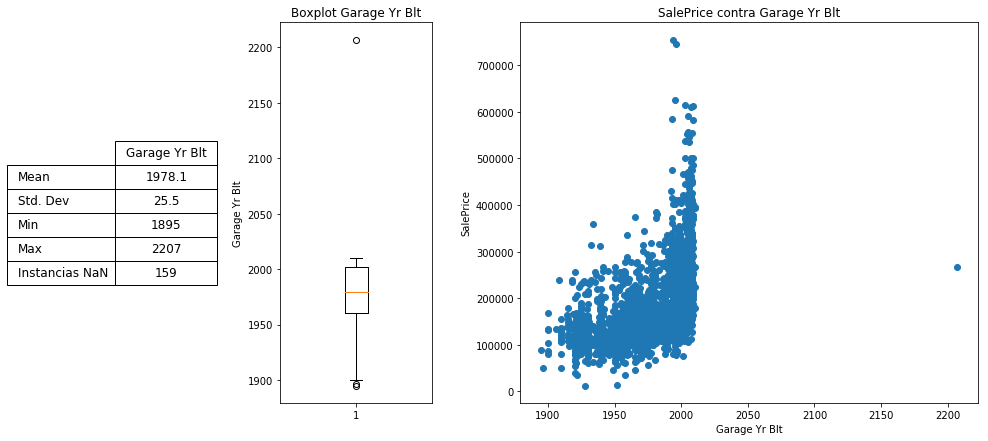

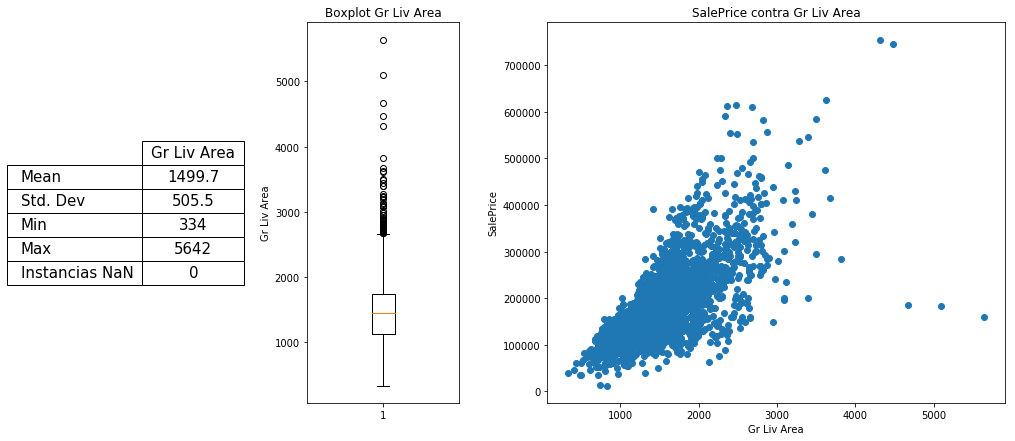

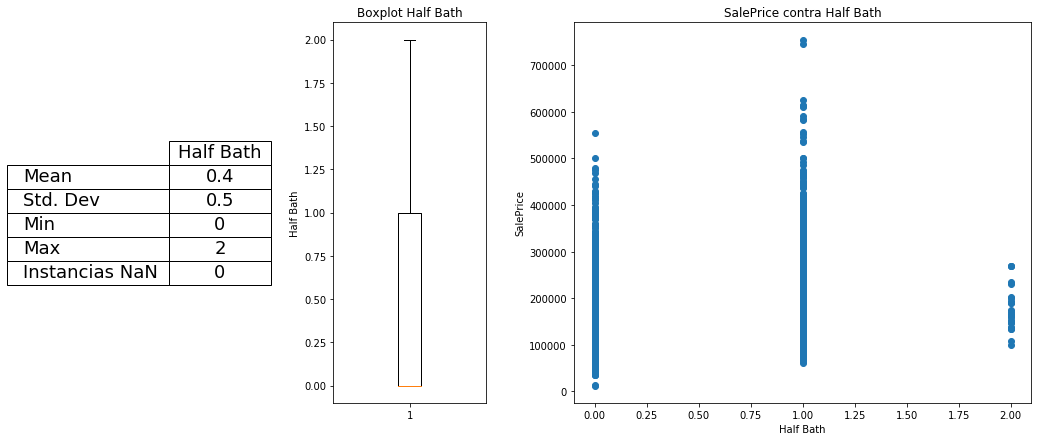

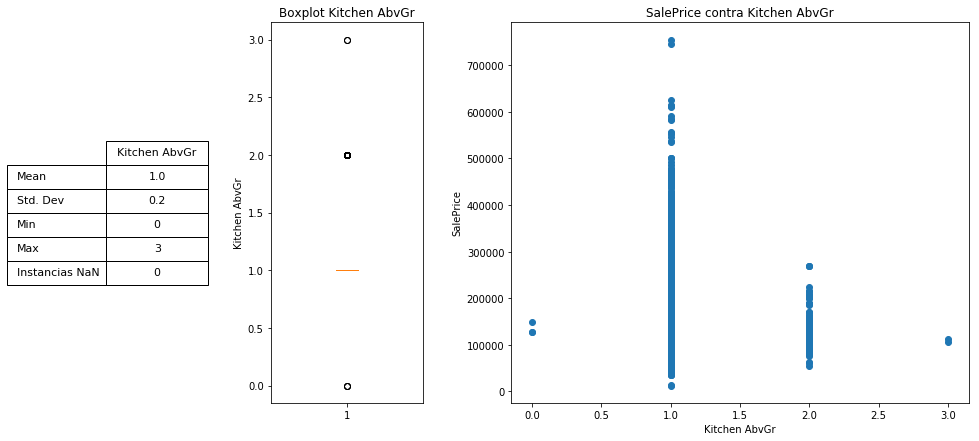

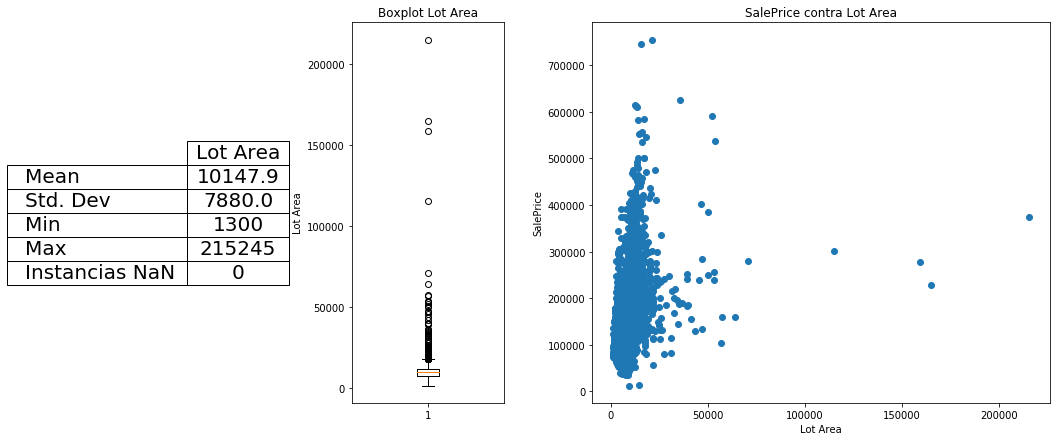

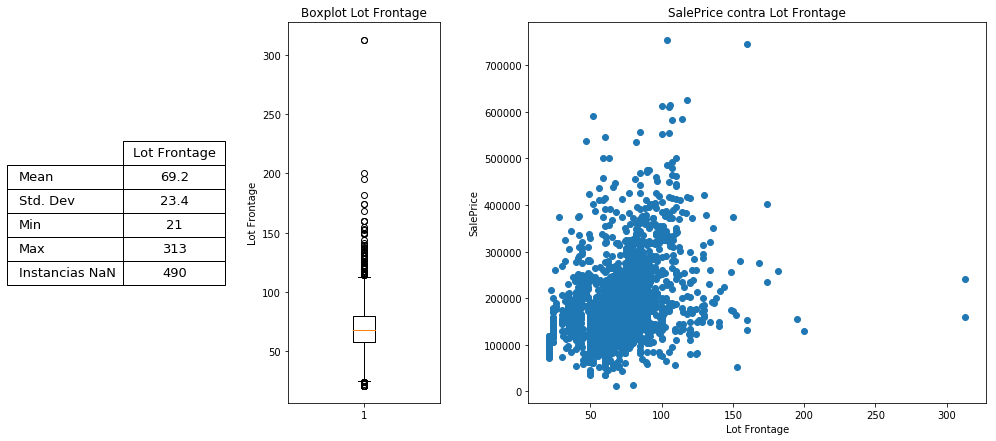

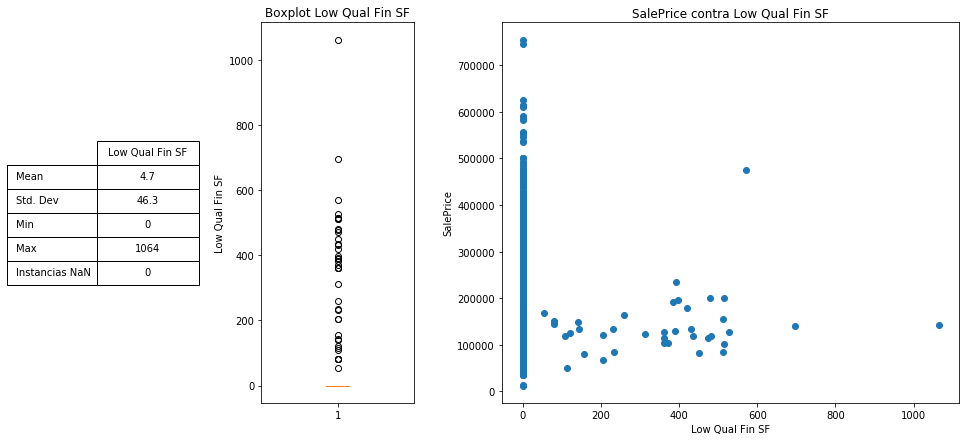

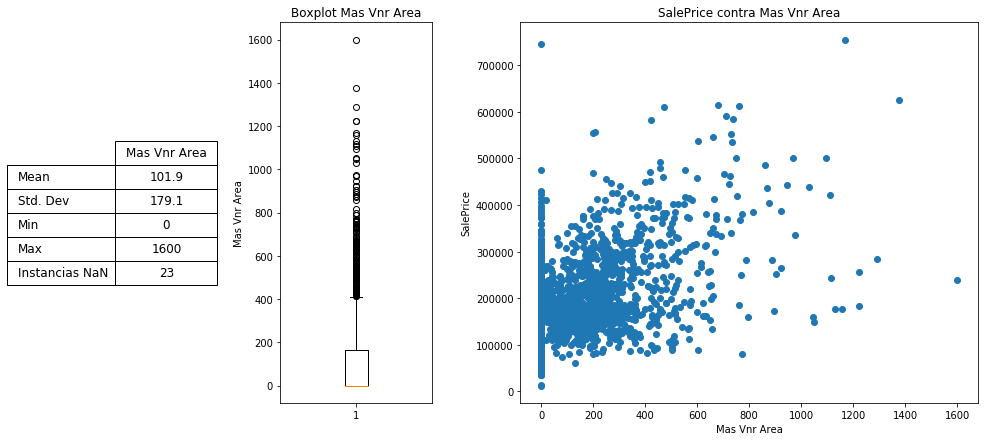

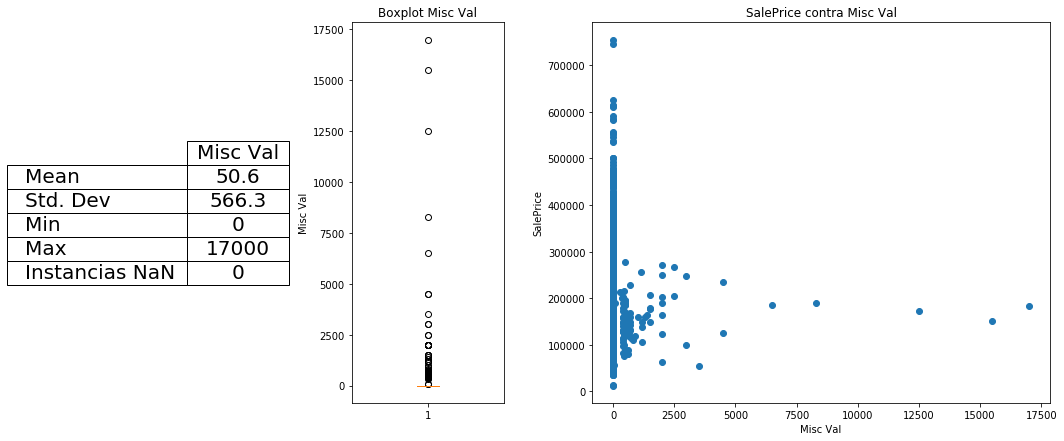

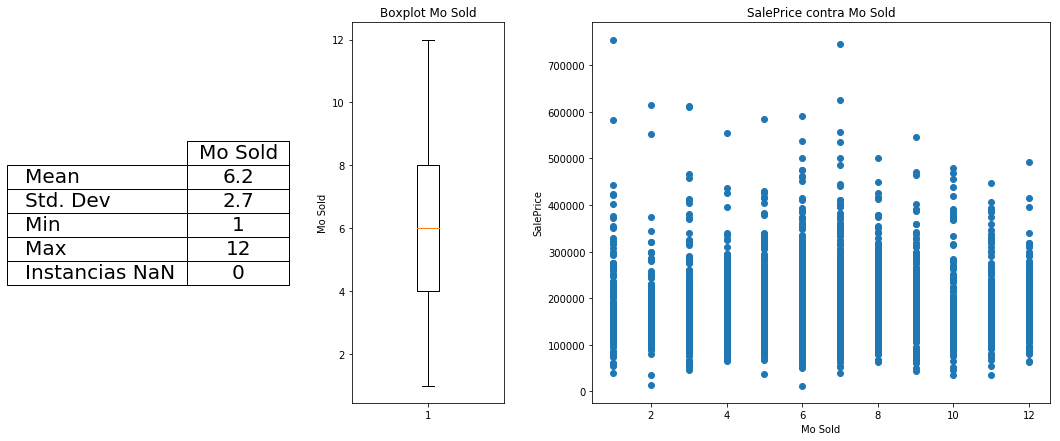

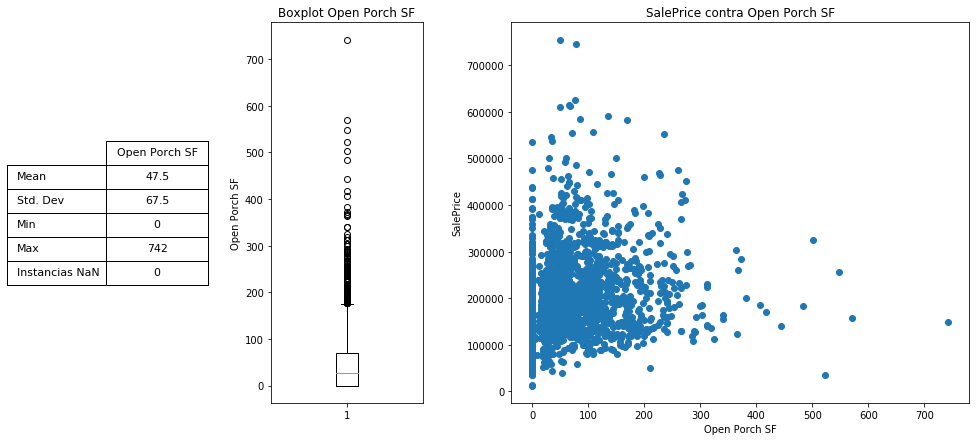

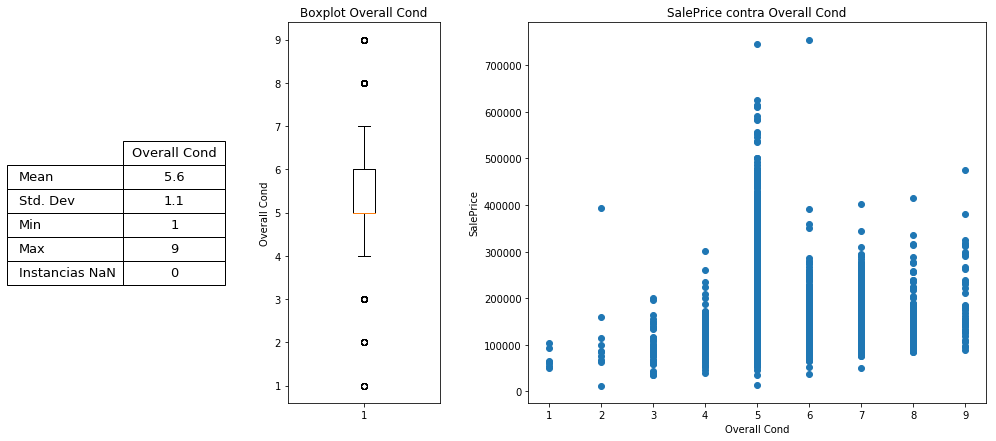

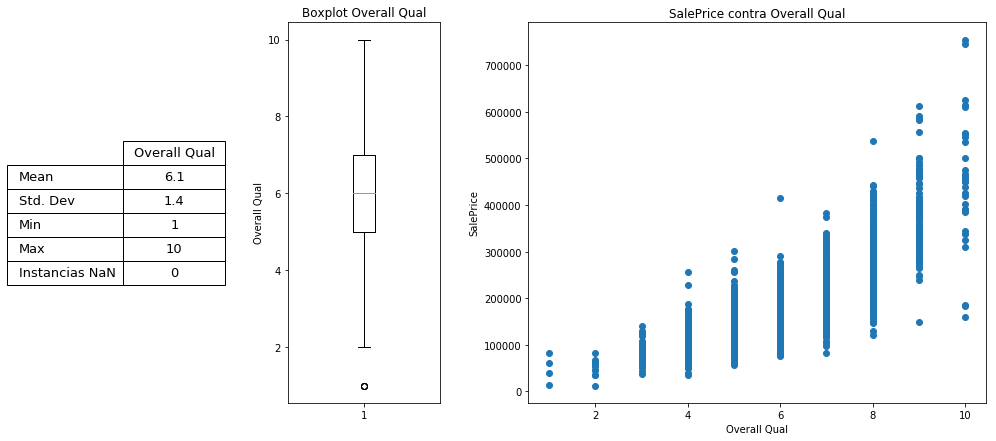

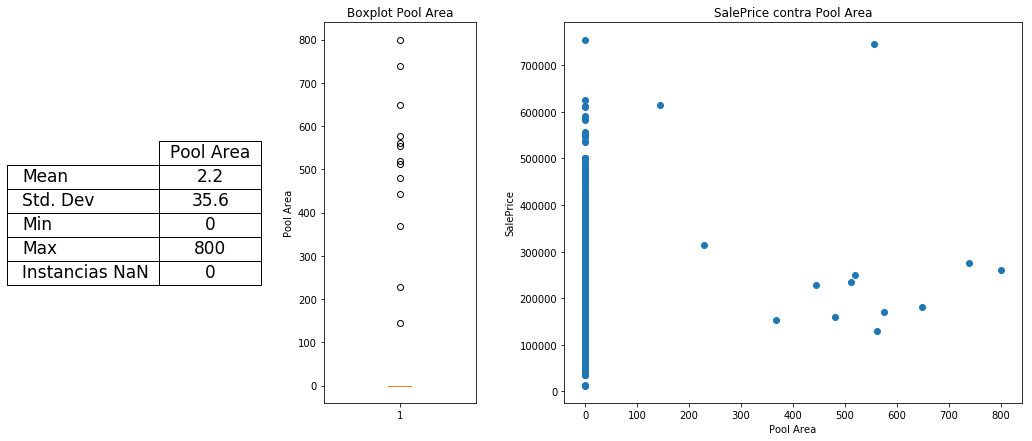

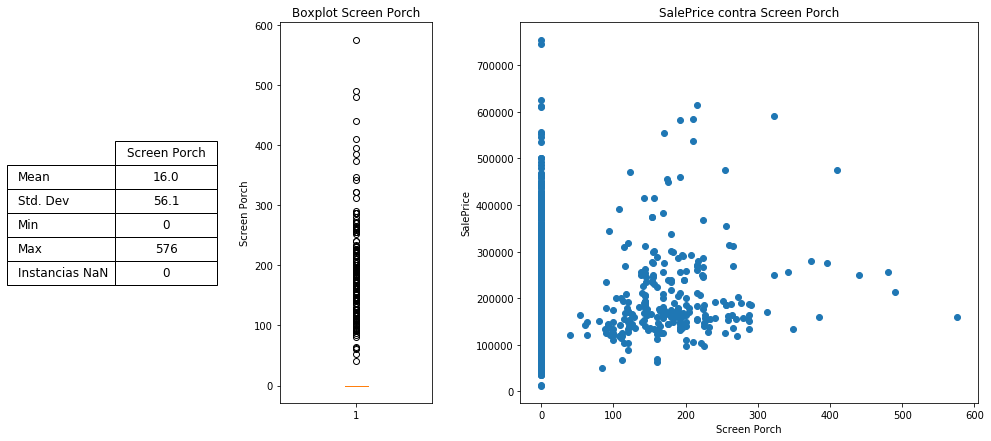

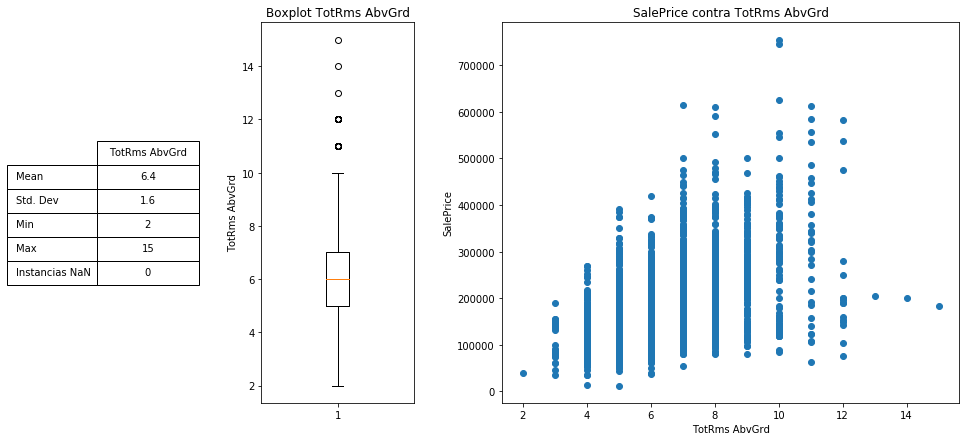

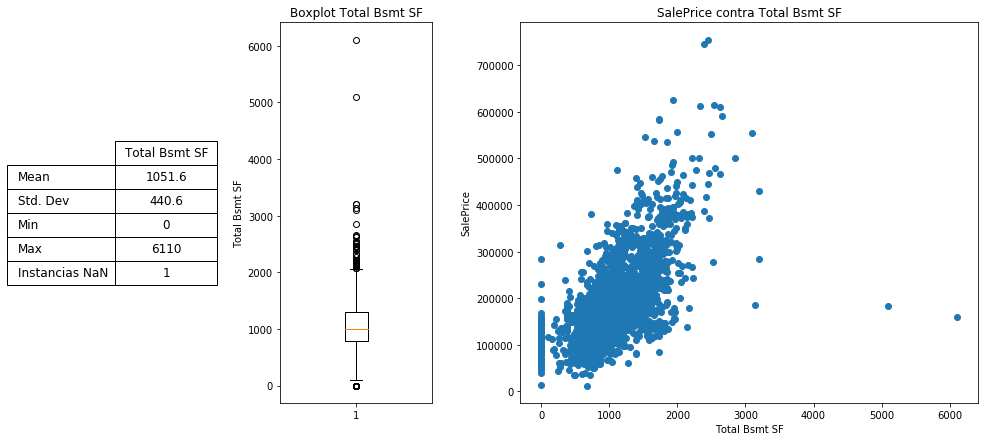

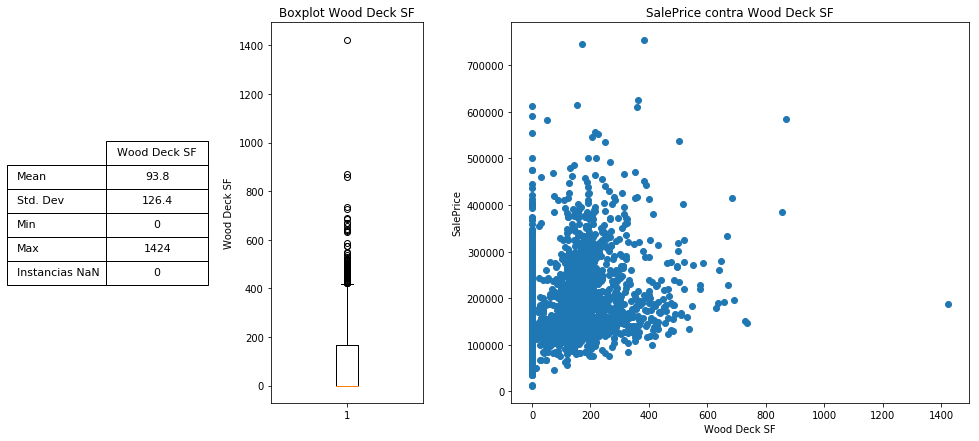

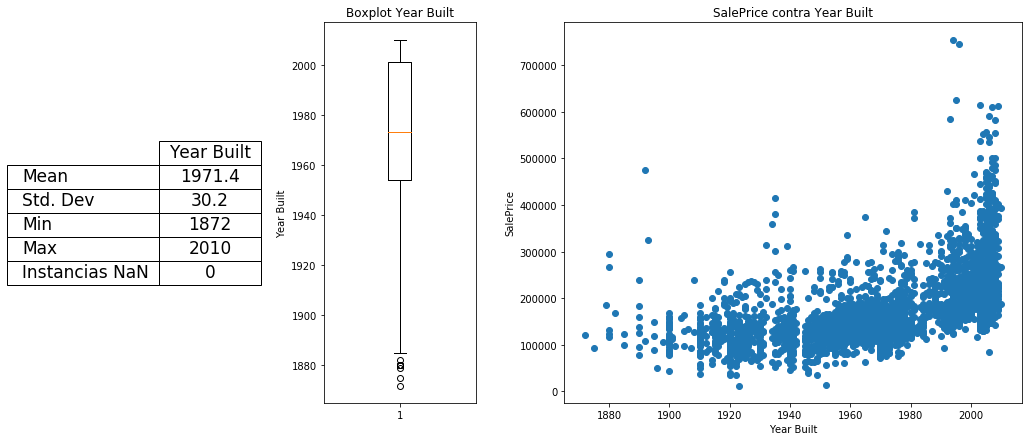

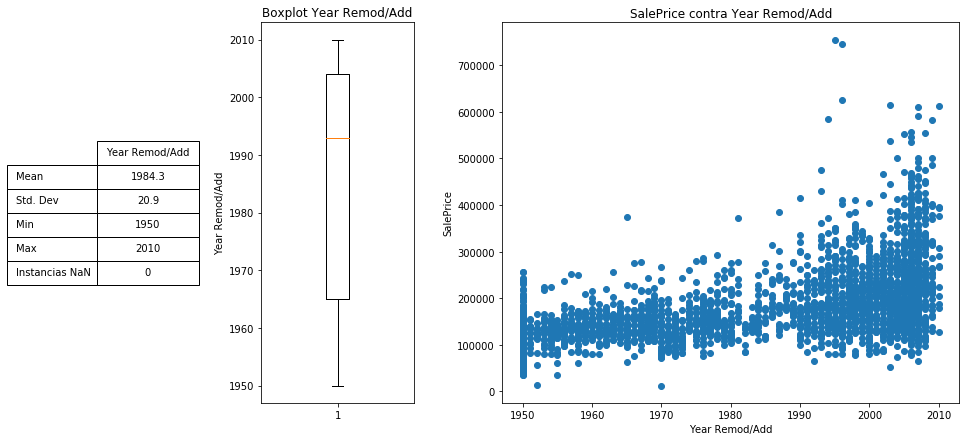

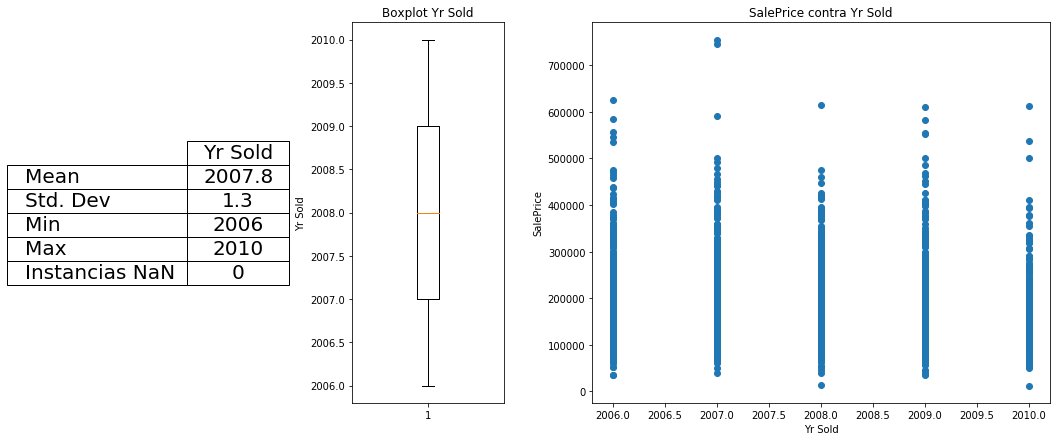

In [143]:
pylab.rcParams['figure.figsize'] = (15, 7)
for num in np.setdiff1d(numerical,label):
    
    fig, (ax1, ax11, ax2) = plt.subplots(1,3, gridspec_kw={'width_ratios': [1, 3, 9]})
    plt.subplots_adjust(wspace=0.4)
    
    ax1.axis('off') 
    
    cellText = [["%0.1f" % (means[num])], ["%0.1f" % (std[num])], ["%d" % (mins[num])], 
                ["%d" % (maxs[num])], ["%d" % (numnans[num])]]
    
    table = ax1.table(cellText=cellText, rowLabels=["Mean","Std. Dev", "Min", "Max","Instancias NaN"], 
                      colLabels=[num], loc='center', cellLoc="center")
    table.set_fontsize(20)
    table.scale(2,2)
    
    no_nans = data_num[~data_num[num].isna()]
    
    ax11.boxplot(no_nans[num])
    ax11.set_title("Boxplot %s" % num)
    ax11.set_ylabel(num)
    
    ax2.plot(no_nans[num],no_nans[label],'o', label="Valores reales")
    
    ax2.set_title("%s contra %s" % (label, num))
    ax2.set_xlabel(num)
    ax2.set_ylabel(label)
    
    num = num.replace("/","-")
    fig.savefig("graphs/"+num+".png",bbox_inches='tight')
    
    plt.show()

# SalePrice

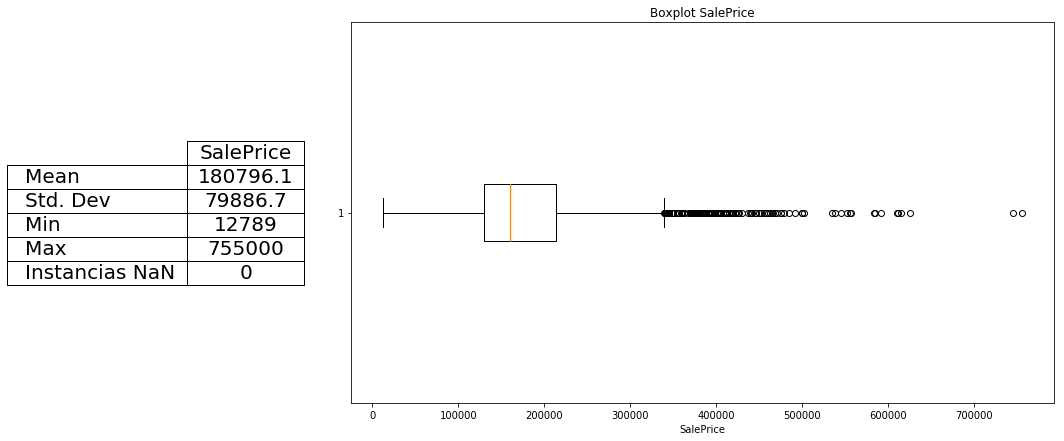

In [142]:
pylab.rcParams['figure.figsize'] = (15, 7)

fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 12]})
plt.subplots_adjust(wspace=0.2)

ax1.axis('off') 

cellText = [["%0.1f" % (means[label])], ["%0.1f" % (std[label])], ["%d" % (mins[label])], 
            ["%d" % (maxs[label])], ["%d" % (numnans[label])]]

table = ax1.table(cellText=cellText, rowLabels=["Mean","Std. Dev", "Min", "Max","Instancias NaN"], 
                  colLabels=[label], loc='center', cellLoc="center")
table.set_fontsize(20)
table.scale(2,2)

no_nans = data_num[~data_num[label].isna()]

ax2.boxplot(no_nans[label], vert=False)
ax2.set_title("Boxplot %s" % label)
ax2.set_xlabel(label)

fig.savefig("graphs/SalePrice.png")

plt.show()